<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA (Principle Component Analysis)**

**Projection**

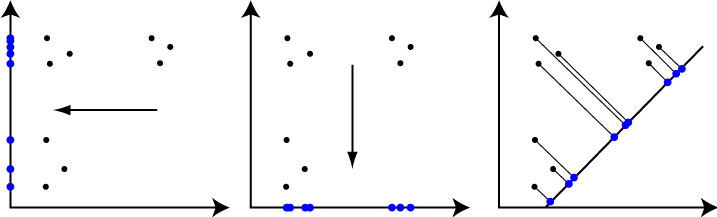


# PCA (Principle)

1.standardzing the Data (ปรับ mean และ std ให้ มี mean = 0 std=1)

2.Calculating the covariance matrix

3.Computing the Eigenvecter and Eigenvalue

4.Picking Principal Components Using the explained varianc

5.Project Data Onto Lower-Dimensional Linear Subspace

***
# **PCA Step by Step**

In [5]:
import pandas as pd # LOAD DATA

In [6]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')

In [7]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


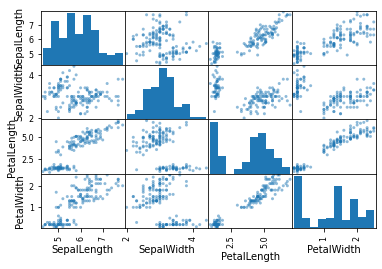

In [8]:
pd.plotting.scatter_matrix(example_df);

In [9]:
import numpy as np

In [10]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
data_matrix = data_matrix.T
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

***

# **1. Stranardizing the data (ปรับ mean และ std ให้มี mean=0 std=1)**

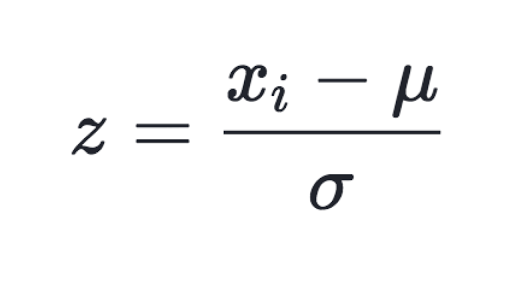

### **วิธีซับซ้อน**

In [12]:
meanD = np.mean(data_matrix,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [13]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [14]:
zeromatrix = np.zeros((4,10))
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
zeromatrix-meanD

ValueError: ignored

In [17]:
zeromatrix-meanD.reshape((4,1)) ## reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

In [18]:
##เลื่อน mean มาที่ 0

data_matrix_m0 = data_matrix - meanD.reshape((4,1))
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [20]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

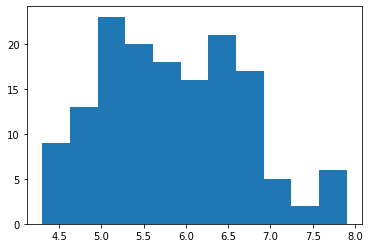

In [21]:
plt.hist(data_matrix[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

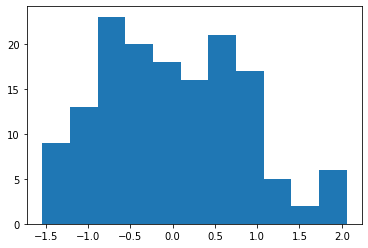

In [22]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

In [23]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.87002413, -1.47347474, -1.07692535, -0.68037595, -0.28382656,
         0.11272284,  0.50927223,  0.90582163,  1.30237102,  1.69892041,
         2.09546981,  2.4920192 ]),
 <a list of 11 Patch objects>)

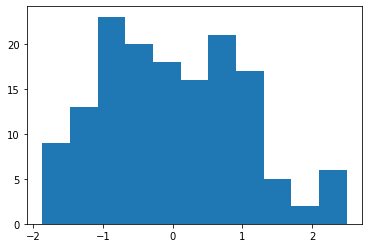

In [24]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

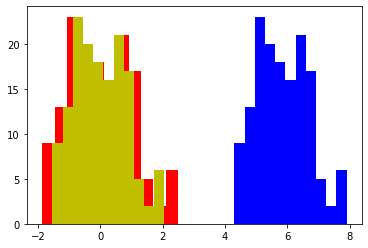

In [25]:
plt.hist(data_matrix[0,:], bins = 'rice', color ='b')
plt.hist(data_matrix_m0_std1[0,:], bins = 'rice', color ='r')
plt.hist(data_matrix_m0[0,:], bins = 'rice', color ='y')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

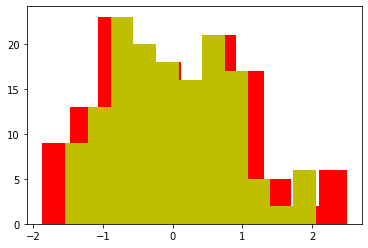

In [26]:
plt.hist(data_matrix_m0_std1[0,:], bins = 'rice', color ='r')
plt.hist(data_matrix_m0[0,:], bins = 'rice', color ='y')

In [27]:
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [29]:
np.mean(data_matrix_m0_std1,axis=1)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [30]:
np.std(data_matrix_m0_std1,axis=1)

array([1., 1., 1., 1.])

***

### **วิธีแบบเร็ว**

In [31]:
from scipy import stats

In [32]:
stats.zscore(data_matrix,axis=1)

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

# **2. Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)**

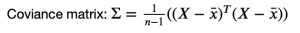

In [ ]:
pd.plotting.scatter_matrix(example_df);

In [ ]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

***
# **3. คำนวณ eigen_value และ eigen vector**

In [ ]:
eigen_values , eigen_vectors = np.linalg.eig(data_cov)
eigen_values
eigen_vectors

***
#**4. Picking Principal Components Using the Explained Variance**

#**คำนวนว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน**

In [ ]:
variance_explained = []
for i in eigen_values: 
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

In [ ]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

 ***
 # **5.Project Data Onto Lower-Dimensional Linear Subspace**

In [ ]:
X = data_matrix_m0_std1
X.shape

In [ ]:
W = selected_eigen_vectors
W.shape

In [ ]:
X_pca = X.T.dot(W)
X_pca

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

***
#**PCA**

import

In [33]:
from sklearn.decomposition import PCA

In [34]:
 pca = PCA(n_components=2)

In [35]:
#Fit - transform
new_pca =pca.fit_transform
new_pca

<bound method PCA.fit_transform of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

Exam

In [36]:
import pandas as pd

In [38]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [39]:
data.shape

(8618, 45)

ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

KeyboardInterrupt: ignored

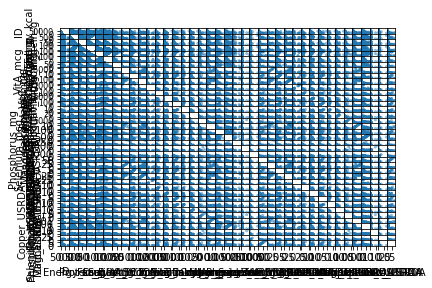

In [40]:
pd.plotting.scatter_matrix(data)

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [ ]:
#เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข
newdata = data.iloc[:,7:]
newdata.head()

ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [ ]:
import numpy as np

In [ ]:
corr = np.corrcoef(newdata.to_numpy().T)

In [ ]:
corr.shape

In [ ]:
corr

In [ ]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

In [ ]:
newdata.iloc[:5,10:30]

data ที่มี correlation เป็น 1

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

In [ ]:
#จะมีกราฟที่หน้าตาเหมือนกับ data ที่อยู่จุดเดียวกันมา plot 
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

data ที่มี correlation เป็นค่าอื่นๆ

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,28],'r.')

เมื่อเราได้ correlation ที่ได้ เราจะรู้ว่าตารางไหนซ้ำ เราก็จะกำจัดตารางที่ซ้ำออก

In [ ]:
newdata.columns
#จะเห็นได้ว่า '_USRDA' เป็น columns ที่ซ้ำและเราต้องการจะลบ

In [ ]:
newdata.columns[newdata.columns.str.contains('_USRDA')]
#เป็นการหา columns ที่มี _USRDA โดยถ้ามีจะเป็น ture ไม่มีจะเป็น false

In [ ]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values
#เมื่อ .valuse ก็จะเอาเฉพาะ columns ที่ตรงตามเงื่อนไข คือ ture

In [ ]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1) 
#การลบ columns ต้องใส่ asix = 1 ถ้าลบ row asix = 0
#เป็นการลบ columns ที่มีชื่อข้างหลังคือ _USRDA 

In [ ]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

In [ ]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

Quiz3 ลบ columns ที่มีค่า correlation = 1 เมื่อเทียบกับ columnsอื่น

In [ ]:
newdata.iloc[:5,10:30]

In [ ]:
data.head(2)

In [ ]:
data_newvy = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitC_mg','Niacin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_newvy.head(10)

In [ ]:
pd.plotting.parallel_coordinates(data_newvy, 'FoodGroup')
#พอมีข้อมูล food group มากๆ จะทำให้ดูข้อมูลยาก

In [ ]:
pd.plotting.parallel_coordinates(data_newvy, 'FoodGroup', cols=['Protein_g','Fat_g'])

ปัญหาที่เกิดขึ้นคือ Dimention ของเราเยอะไป เราจึงต้องทำ PCA ในการจัดการข้อมูล

ทำ PCA เพื่อลดจำนวน dimention ของข้อมูล

In [ ]:
#import
from sklearn.decomposition import PCA

In [ ]:
#defind
pca = PCA(n_components=2)

In [ ]:
New_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [ ]:
New_pca.shape

In [ ]:
#เอาค่าข้างใน columns มาก่อน
FG = set(data['FoodGroup']) #หาค่าที่เป็นไปได้ทั้งหมด
FG

In [ ]:
color_list = {}
num = 0
for each_fg in FG:
   if each_fg not in color_list:
#สร้าง dictionaly เพื่อสร้างเก็บข้อมูล โดยการวนลูป
       color_list[each_fg] = num
       num += 1

In [ ]:
FG_l = list(FG)
FG_l.sort() #เป้นการเรียงค่า ตัวเลขจากน้อยไปมาก ตัวหนังสือจาก a-z
color_list2 = {}
num = 0
for each_fg in FG_l:
   if each_fg not in color_list2:
#สร้าง dictionaly เพื่อสร้างเก็บข้อมูล โดยการวนลูป
       color_list2[each_fg] = num
       num += 1

In [ ]:
color_list2

In [ ]:
color_list 

In [ ]:
data_dropped2 = data_dropped.replace(color_list2)

In [ ]:
data_dropped2

In [ ]:
plt.scatter(New_pca[:,0],New_pca[:,1],c = data_dropped2['FoodGroup'])

In [ ]:
plt.scatter(New_pca[:,0],New_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

In [ ]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb #ทดลองเปรียบเทียบ

In [ ]:
pca = PCA(n_components=2) #ต้องการแค่ 2 dimention
new_pca = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = bb['FoodGroup'],alpha=0.5)

In [ ]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca = pca.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

In [ ]:
plt.scatter(baby_pca[:,0],baby_pca[:,1],c ='c',alpha=0.5)

In [ ]:
plt.scatter(fast_pca[:,0],fast_pca[:,1],c = 'r',alpha=0.5)

In [ ]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5, label = 'baby') 
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5, label = 'fast')
plt.legend()

2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [ ]:
pca.explained_variance_ratio_